# Milestone 1 Phase 1

Holla.. Irpan Habibi's here from Batch 004 Hacktiv8's Fulltime Data Science Programs

# Problem

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is **to predict if the client will subscribe (yes/no) a term deposit (variable y)**.

**Attribute Information:**

Input variables:

**#bank client data:**

- **age** (numeric)
- **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- **default** : has credit in default? (categorical: 'no','yes','unknown')
- **housing** : has housing loan? (categorical: 'no','yes','unknown')
- **loan** : has personal loan? (categorical: 'no','yes','unknown')

**#related with the last contact of the current campaign:**

- **contact** : contact communication type (categorical: 'cellular','telephone')
- **month** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day_of_week** : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- **duration** : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**#other attributes:**

- **campaign** : number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays** : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous** : number of contacts performed before this campaign and for this client (numeric)
- **poutcome** : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**#social and economic context attributes**

- **emp.var.rate** : employment variation rate - quarterly indicator (numeric)
- **cons.price.idx** : consumer price index - monthly indicator (numeric)
- **cons.conf.idx** : consumer confidence index - monthly indicator (numeric)
- **euribor3m** : euribor 3 month rate - daily indicator (numeric)
- **nr.employed** : number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
- **y** : has the client subscribed a term deposit? (binary: 'yes','no')

***ii. Import Libraries***

The first step in building the model is to import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

from time import time
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

***iii. Data Loading***

In [2]:
data = 'bank-additional-full.csv'
df = pd.read_csv(data,delimiter=';')

***iv. Explonatory Data Analysis***

We have loaded the data. Now, its time to explore the data to gain insights about it.

- *View dimensions of dataset*

In [3]:
df.shape

(41188, 21)

- *View column names*

In [4]:
cols = df.columns
cols

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

- *Preview the dataset*

In [5]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
27614,55,entrepreneur,divorced,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
34517,53,admin.,married,high.school,no,no,no,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
34883,32,technician,single,professional.course,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
40767,34,technician,single,university.degree,no,no,no,cellular,sep,fri,...,3,999,1,failure,-1.1,94.199,-37.5,0.879,4963.6,yes
37196,42,unemployed,married,unknown,no,yes,yes,cellular,aug,thu,...,4,4,2,success,-2.9,92.201,-31.4,0.883,5076.2,yes
5154,37,blue-collar,single,basic.9y,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15580,39,blue-collar,single,basic.4y,unknown,no,no,telephone,jul,fri,...,24,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
17611,55,blue-collar,divorced,basic.4y,no,yes,no,cellular,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
2703,38,technician,married,basic.6y,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
7113,30,blue-collar,single,basic.4y,unknown,yes,yes,telephone,may,thu,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no


- *View summary of dataset*

The `info()` method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We can see that the dataset contains mixture of categorical and numerical variables. 
Categorical variables have data type `object`. 
Numerical variables have data type `int64` and `float64`.
Also, there are no missing values in the dataset. But We still explore it later to find any anomali on dataset.

- *View statistical properties of dataset `Numerical`*

The `describe()` helps us to view the statistical properties of numerical variables. It excludes character variables.

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


As we can see, there are several variables that have an abnormal distribution and there are anomalies in the `pdays` variable, that is because the max and quantile values of the variable is 999. This has actually been explained in the description of the dataset that the variable `pdays`, `999` means the client was not previously contacted.

- *View statistical properties of dataset `Categorical`*

If we want to view the statistical properties of character variables use command `describe(include=['object'])` and you can transpose it.

In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


- ***Univariate Analysis***

**Explore target variable**

Firstly, I'll rename variable names column `y` to `subsrcibed` with command `rename()`.

In [9]:
df = df.rename(columns={'y':'subscribed'})

check for update column names

In [10]:
cols = df.columns
cols

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [11]:
print('Frequency distribution of values:\n', df['subscribed'].value_counts(), 
      '\nPercentage of frequency distribution of values:\n', df['subscribed'].value_counts()/len(df))

Frequency distribution of values:
 no     36548
yes     4640
Name: subscribed, dtype: int64 
Percentage of frequency distribution of values:
 no     0.887346
yes    0.112654
Name: subscribed, dtype: float64


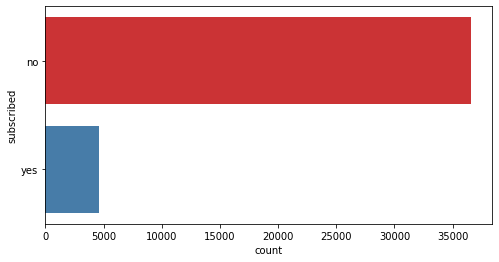

In [12]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="subscribed", data=df, palette="Set1")
plt.show()

The number of unique values in `subscribed` variable is 2.

The two unique values are No and Yes.

Out of the total number of `subscribed` values, No appears 88.73% and Yes appears 11.27%.

The univariate plot confirms our findings that :

- The No variable have 36548 entries, and

- The Yes variable have 4640 entries.

- ***Bivariate Analysis***

**Types of variables**

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64 and float64.

First of all, I will find categorical variables.

**Explore categorical variables**

In [13]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 11 categorical variables

The categorical variables are : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribed']


In [14]:
df[categorical].sample(8)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
38827,services,married,high.school,no,no,no,telephone,nov,fri,success,yes
13607,blue-collar,married,basic.4y,no,yes,no,cellular,jul,thu,nonexistent,no
31246,management,married,university.degree,no,no,no,cellular,may,wed,nonexistent,yes
29690,admin.,married,university.degree,no,yes,no,cellular,apr,mon,failure,no
31731,self-employed,married,basic.4y,no,no,no,cellular,may,thu,nonexistent,no
15450,services,single,professional.course,no,yes,no,cellular,jul,fri,nonexistent,yes
27645,technician,single,university.degree,no,no,no,cellular,nov,fri,nonexistent,no
25822,technician,married,basic.9y,no,no,no,cellular,nov,wed,nonexistent,no


There are 11 categorical variables and there are four binary categorical variables - `default`,`housing`,`loan` and `subscribed`.

`subscribed` is the target variable.

In [15]:
#view missing value
df[categorical].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
subscribed     0
dtype: int64

In [16]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64
may    13769
jul     7174
aug     6178

In [17]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64
married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64
university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64
no         0.791201
unknown    0.208726
yes        0.000073
Name: default, dtype: float64
yes        0.523842
no         0.452122
unknown    0.024036
Name: housing, dtype: float64
no         0.824269
yes        0.151695
unknown    0.024036
Name: loan, dtype: f

In [18]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

job  contains  12  labels
marital  contains  4  labels
education  contains  8  labels
default  contains  3  labels
housing  contains  3  labels
loan  contains  3  labels
contact  contains  2  labels
month  contains  10  labels
day_of_week  contains  5  labels
poutcome  contains  3  labels
subscribed  contains  2  labels


**Explore Numerical Variable**

In [19]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 10 numerical variables

The numerical variables are : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [20]:
df[numerical].sample(8)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
13579,30,140,2,999,0,1.4,93.918,-42.7,4.963,5228.1
3264,41,500,1,999,0,1.1,93.994,-36.4,4.860,5191.0
19994,50,455,4,999,0,1.4,93.444,-36.1,4.966,5228.1
34724,30,72,7,999,0,-1.8,92.893,-46.2,1.266,5099.1
39239,55,106,2,999,1,-1.8,93.369,-34.8,0.651,5008.7
11093,46,172,3,999,0,1.4,94.465,-41.8,4.961,5228.1
14744,49,221,1,999,0,1.4,93.918,-42.7,4.957,5228.1
24921,36,99,1,999,1,-0.1,93.200,-42.0,4.153,5195.8


In [21]:
print(round(df[numerical].describe()))

           age  duration  campaign    pdays  previous  emp.var.rate  \
count  41188.0   41188.0   41188.0  41188.0   41188.0       41188.0   
mean      40.0     258.0       3.0    962.0       0.0           0.0   
std       10.0     259.0       3.0    187.0       0.0           2.0   
min       17.0       0.0       1.0      0.0       0.0          -3.0   
25%       32.0     102.0       1.0    999.0       0.0          -2.0   
50%       38.0     180.0       2.0    999.0       0.0           1.0   
75%       47.0     319.0       3.0    999.0       0.0           1.0   
max       98.0    4918.0      56.0    999.0       7.0           1.0   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
count         41188.0        41188.0    41188.0      41188.0  
mean             94.0          -41.0        4.0       5167.0  
std               1.0            5.0        2.0         72.0  
min              92.0          -51.0        1.0       4964.0  
25%              93.0          -43.0        1

There are 10 numerical variables and all of the numerical variables are of continuous type. We can see value in `pdays` are anomalies, so we need to cleaning the values. 

On closer inspection, we can see that the `age`, `duration`and `campaign` columns may contain outliers.

I will draw boxplots to visualise outliers in the above variables.

Text(0, 0.5, 'Previous')

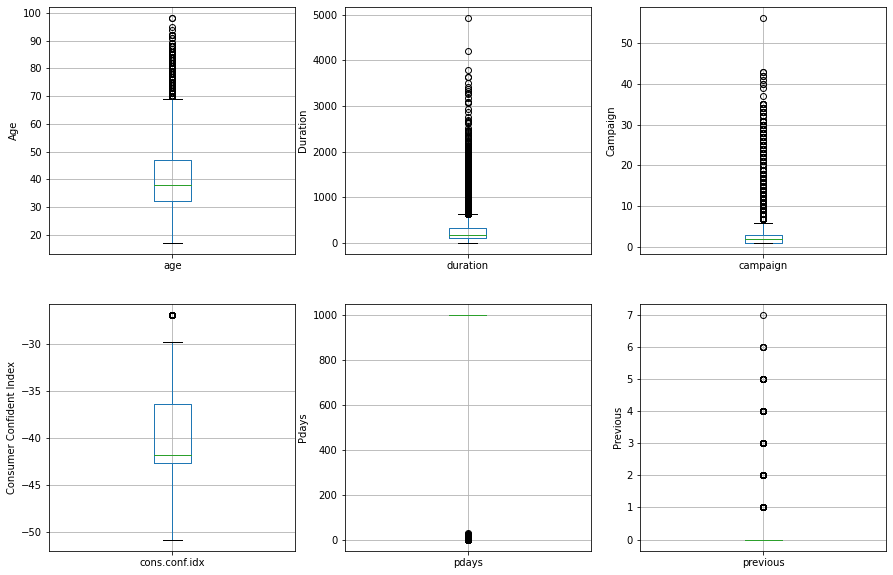

In [22]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = df.boxplot(column='age')
fig.set_title('')
fig.set_ylabel('Age')


plt.subplot(2, 3, 2)
fig = df.boxplot(column='duration')
fig.set_title('')
fig.set_ylabel('Duration')


plt.subplot(2, 3, 3)
fig = df.boxplot(column='campaign')
fig.set_title('')
fig.set_ylabel('Campaign')


plt.subplot(2, 3, 4)
fig = df.boxplot(column='cons.conf.idx')
fig.set_title('')
fig.set_ylabel('Consumer Confident Index')

plt.subplot(2, 3, 5)
fig = df.boxplot(column='pdays')
fig.set_title('')
fig.set_ylabel('Pdays')

plt.subplot(2, 3, 6)
fig = df.boxplot(column='previous')
fig.set_title('')
fig.set_ylabel('Previous')

In [23]:
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
Lower_fence = df.age.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.age.quantile(0.75) + (IQR * 1.5)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < 9.5 or > 69.5


In [24]:
df[df['age']>69.5].shape

(469, 21)

In [25]:
IQR = df.duration.quantile(0.75) - df.duration.quantile(0.25)
Lower_fence = df.duration.quantile(0.25) - (IQR * 3)
Upper_fence = df.duration.quantile(0.75) + (IQR * 3)
print('Duration outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Duration outliers are values < -549.0 or > 970.0


In [26]:
df[df['duration']>970].shape

(1043, 21)

In [27]:
IQR = df.campaign.quantile(0.75) - df.campaign.quantile(0.25)
Lower_fence = df.campaign.quantile(0.25) - (IQR * 3)
Upper_fence = df.campaign.quantile(0.75) + (IQR * 3)
print('Campaign outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Campaign outliers are values < -5.0 or > 9.0


In [28]:
df[df['campaign']>9.0].shape

(1094, 21)

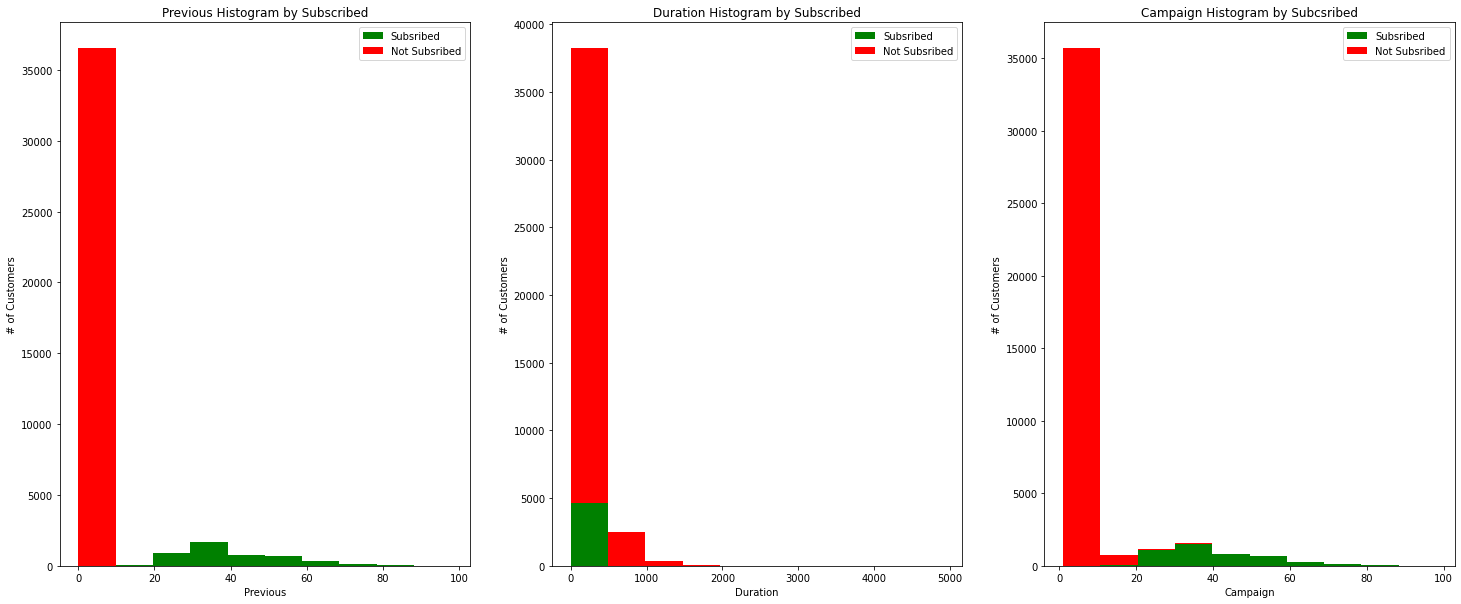

In [29]:
# draw histogram for distribution of variables subscribed or didn't

plt.figure(figsize=(25,10))

plt.subplot(1,3,1)
plt.hist(x = [df[df['subscribed']=='yes']['age'], df[df['subscribed']=='no']['previous']], 
         stacked=True, color = ['g','r'],label = ['Subsribed','Not Subsribed'])
plt.title('Previous Histogram by Subscribed')
plt.xlabel('Previous')
plt.ylabel('# of Customers')
plt.legend()

plt.subplot(1,3,2)
plt.hist(x = [df[df['subscribed']=='yes']['age'], df[df['subscribed']=='no']['duration']], 
         stacked=True, color = ['g','r'],label = ['Subsribed','Not Subsribed'])
plt.title('Duration Histogram by Subscribed')
plt.xlabel('Duration')
plt.ylabel('# of Customers')
plt.legend()

plt.subplot(1,3,3)
plt.hist(x = [df[df['subscribed']=='yes']['age'], df[df['subscribed']=='no']['campaign']], 
         stacked=True, color = ['g','r'],label = ['Subsribed','Not Subsribed'])
plt.title('Campaign Histogram by Subcsribed')
plt.xlabel('Campaign')
plt.ylabel('# of Customers')
plt.legend()

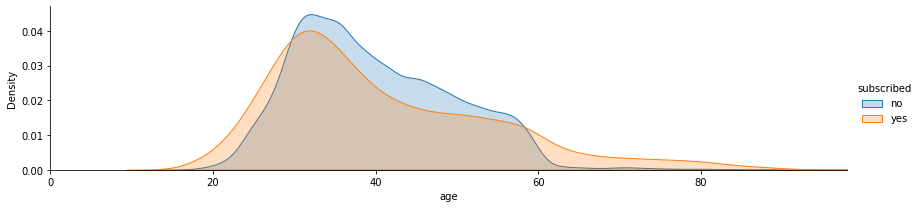

In [30]:
# plot distribution of age of consumers who subsrcibed or didn't 
vs = sns.FacetGrid(df, hue='subscribed', aspect=4)
vs.map(sns.kdeplot, 'age', shade=True)
vs.set(xlim=(0,df['age'].max()))
vs.add_legend()

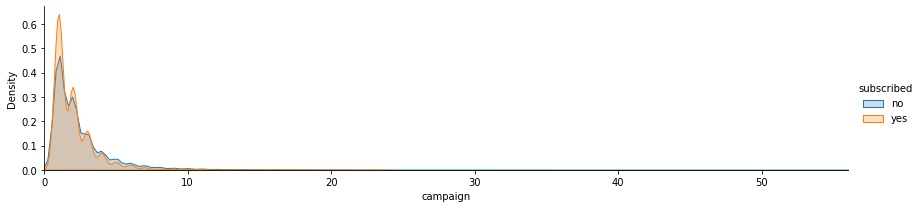

In [31]:
# plot distribution of campaign of consumers who subsrcibed or didn't 
vs = sns.FacetGrid(df, hue='subscribed', aspect=4)
vs.map(sns.kdeplot, 'campaign', shade=True)
vs.set(xlim=(0,df['campaign'].max()))
vs.add_legend()

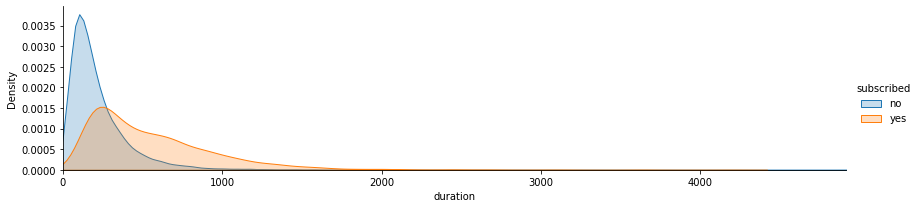

In [32]:
# plot distribution of duration of consumers who subsrcibed or didn't 
vs = sns.FacetGrid(df, hue='subscribed', aspect=4)
vs.map(sns.kdeplot, 'duration', shade=True)
vs.set(xlim=(0,df['duration'].max()))
vs.add_legend()

- ***Multivariate Analysis***

An important step in EDA is to discover patterns and relationships between variables in the dataset. I will use heat map and pair plot to discover the patterns and relationships in the dataset. First of all, I will draw a heat map.

In [33]:
corr = df.corr()
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


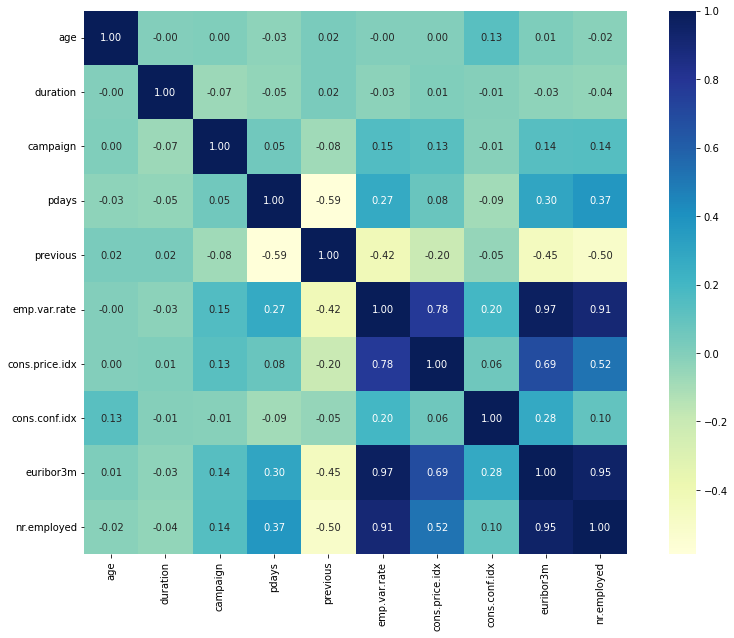

In [34]:
#visualizing correlation 
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, square=True, fmt='.2f', cmap="YlGnBu")
plt.show()

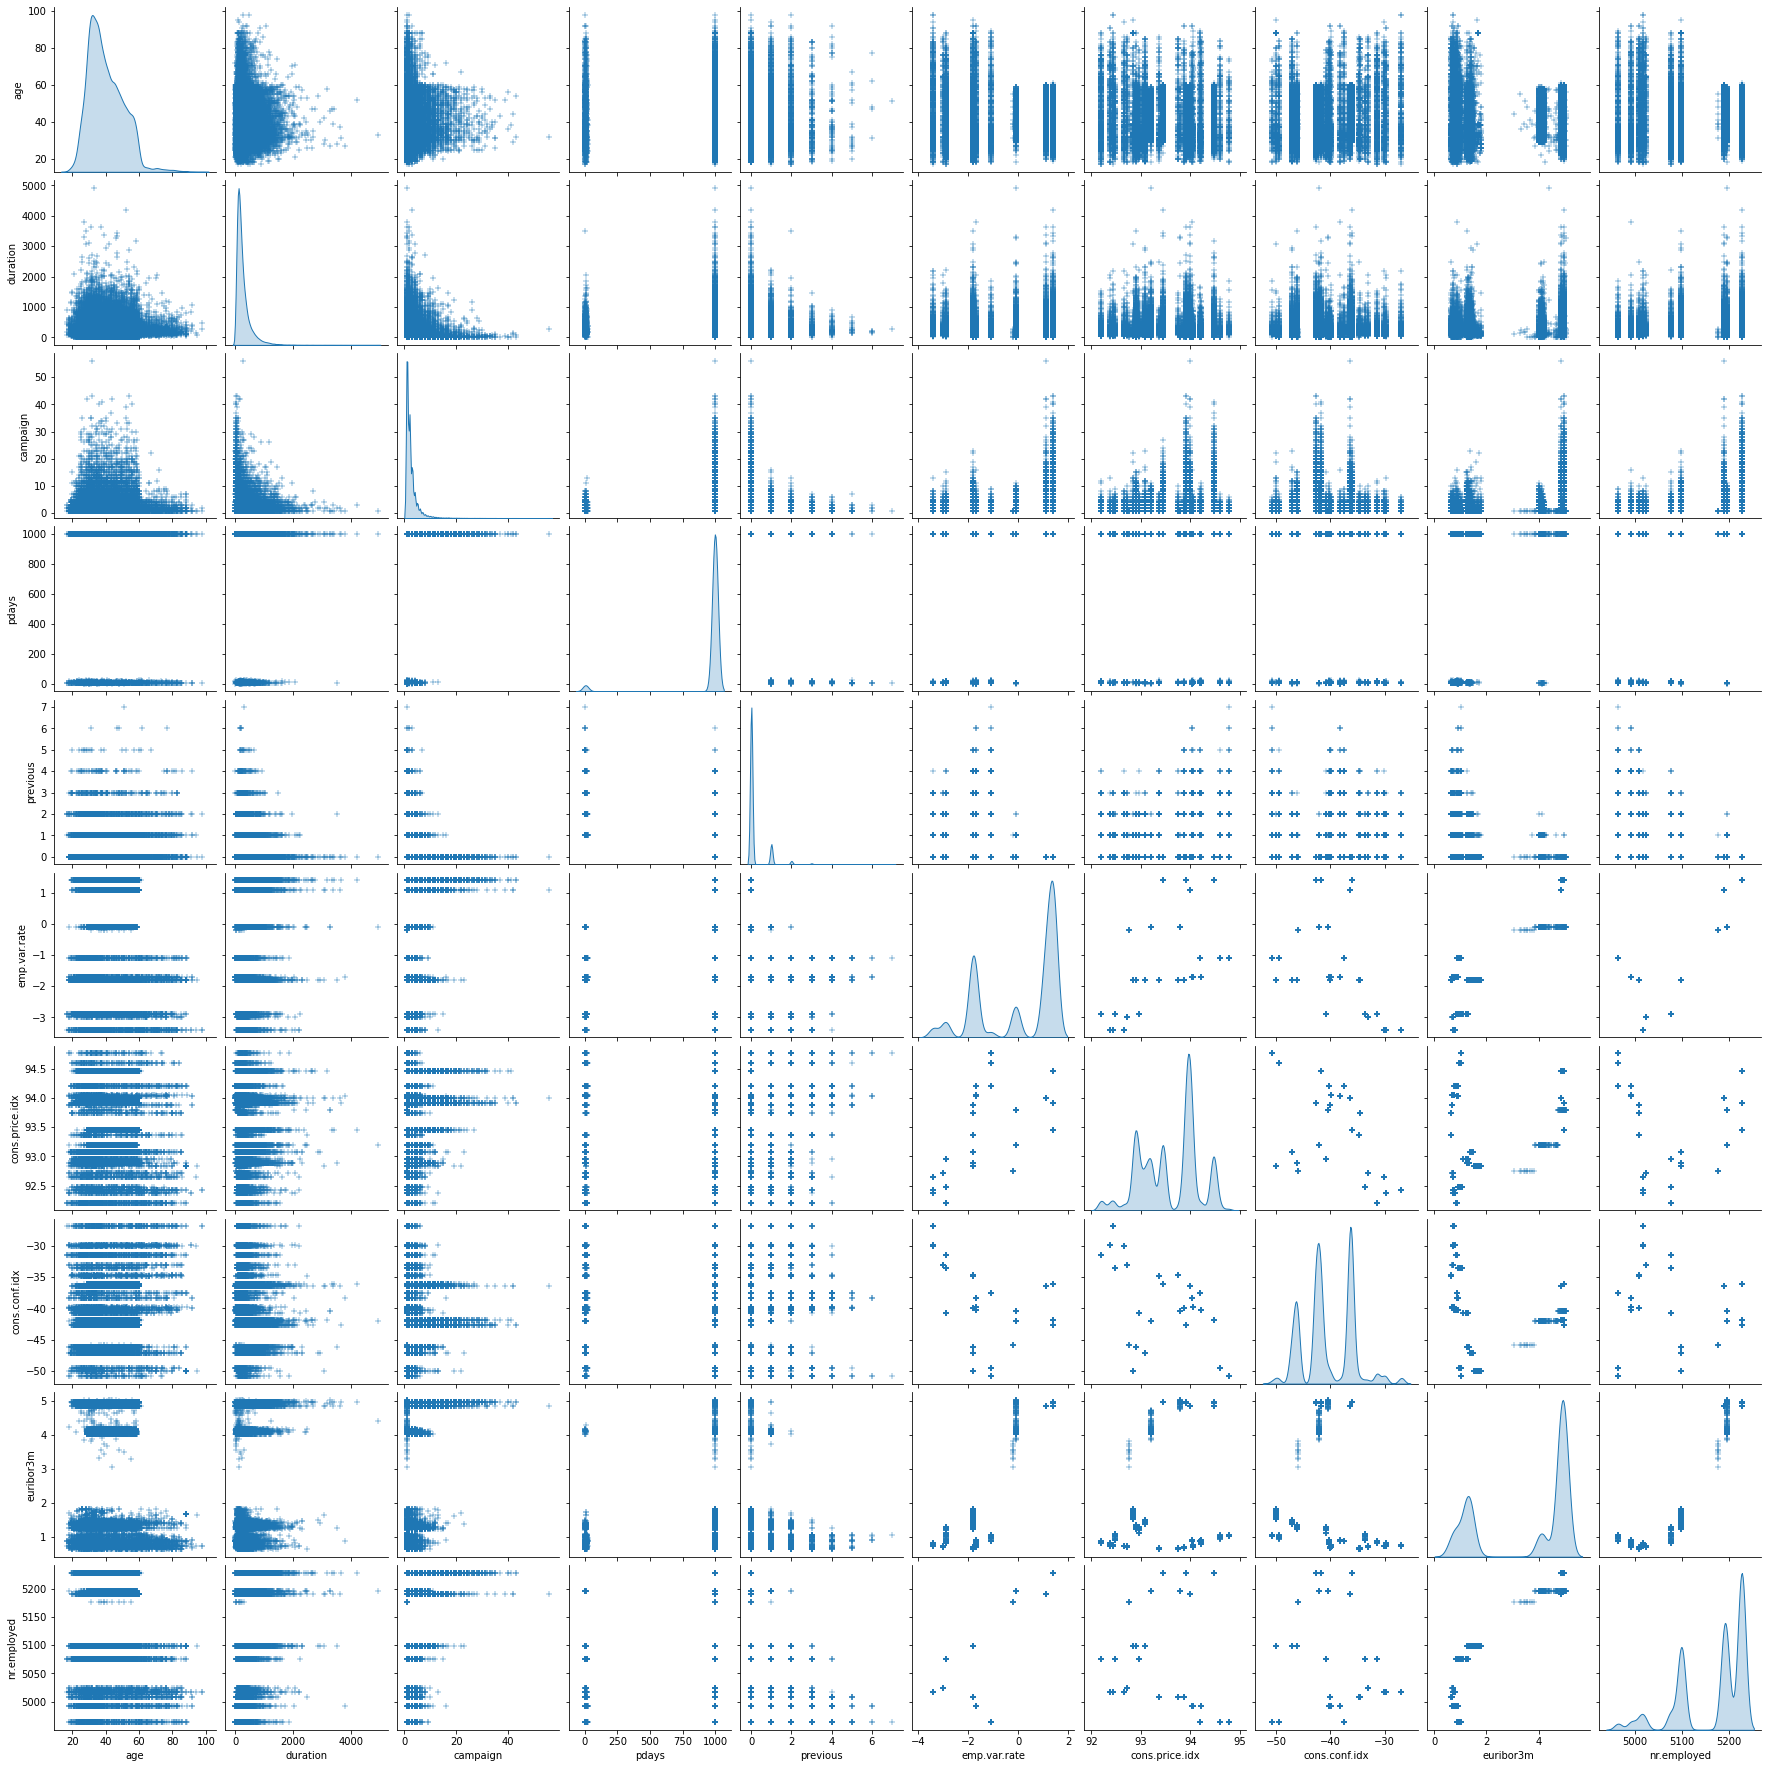

In [35]:
sns.pairplot(data=df[numerical], diag_kind = "kde", markers = "+")
plt.show()

***v. Data Preprocessing***

**Declare feature vector and target variable**

In [36]:
X = df.drop(['subscribed','duration','pdays'], axis=1)

y = df['subscribed']

In [37]:
X.shape, y.shape

((41188, 18), (41188,))

**Split data into separate training and test set**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
X_train.shape, X_test.shape

((32950, 18), (8238, 18))

**Feature Engineering**

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [40]:
X_train.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [41]:
cols = X_train.columns
cols

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [42]:
#Display categorical columns
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [43]:
#Display numerical columns
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [44]:
from sklearn.base import TransformerMixin

class DenseTransformer(TransformerMixin): 
    def fit(self, X, y=None, **fit_params): 
        return self 
    def transform(self, X, y=None, **fit_params): 
        return X.todense()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


    
full_pipeline = ColumnTransformer([
                ('cat',OneHotEncoder(),categorical),
                ('num',StandardScaler(),numerical),
])

X_train = full_pipeline.fit_transform(X_train)

In [46]:
X_train.shape

(32950, 61)

In [47]:
X_test = full_pipeline.transform(X_test)

In [48]:
X_test.shape

(8238, 61)

***Modeling***

# ***1. Logistic Regression***

- **Model Training**

In [49]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
clf_lr = LogisticRegression(random_state=42)

# fit the model
clf_lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

- **Predict Result**

In [50]:
y_pred_test = clf_lr.predict(X_test)

y_pred_test

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [51]:
clf_lr.predict_proba(X_test)[:1]

array([[0.93194032, 0.06805968]])

In [52]:
clf_lr.predict_proba(X_test)[:,0]

array([0.93194032, 0.52487375, 0.43407623, ..., 0.81325287, 0.97619447,
       0.9390229 ])

- **Check accuracy score**

In [53]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9006


- **Compare the train-set and test-set accuracy**

In [54]:
y_pred_train = clf_lr.predict(X_train)

y_pred_train

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8997


In [56]:
# Check for overfitting and underfitting 

print('Training set score: {:.4f}'.format(clf_lr.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_lr.score(X_test, y_test)))

Training set score: 0.8997
Test set score: 0.9006


The training-set accuracy score is 0.9006 while the test-set accuracy to be 0.8997. These two values are quite comparable. So, there is no question of overfitting.

- **Compare model accuracy with null accuracy**

So, the model accuracy is 0.9006. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set.

In [57]:
y_test.value_counts()

no     7310
yes     928
Name: subscribed, dtype: int64

In [58]:
null_acc = (7310/(7310+928))

print('Null accuracy score: {0:0.4f}'. format(null_acc))

Null accuracy score: 0.8874


So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called `Confusion matrix` that comes to our rescue.

- **Confusion Matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

**False Positives (FP)** – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [59]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[7217   93]
 [ 726  202]]

True Positives(TP) =  7217

True Negatives(TN) =  202

False Positives(FP) =  93

False Negatives(FN) =  726


The confusion matrix shows 7217 + 202 = 7419 correct predictions and 726 + 93 = 819 incorrect predictions.

In this case, we have

- True Positives (Actual Positive:1 and Predict Positive:1) - 7217
- True Negatives (Actual Negative:0 and Predict Negative:0) - 202
- False Positives (Actual Negative:0 but Predict Positive:1) - 93 (Type I error)
- False Negatives (Actual Positive:1 but Predict Negative:0) - 726 (Type II error)

<AxesSubplot:>

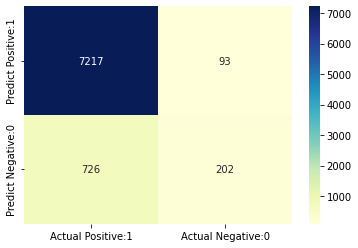

In [60]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

- **Classification Metrices**

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      7310
         yes       0.68      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [62]:
# classification error

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0994


- **Model evaluation and improvement**

In this section, I will employ several techniques to improve the model performance. I will discuss 3 techniques which are used in practice for performance improvement. These are `recursive feature elimination`, `k-fold cross validation` and `hyperparameter optimization using GridSearchCV`.

**Recursive Feature Elimination with Cross Validation**

Recursive feature elimination (RFE) is a feature selection technique that helps us to select best features from the given number of features. At first, the model is built on all the given features. Then, it removes the least useful predictor and build the model again. This process is repeated until all the unimportant features are removed from the model.

Recursive Feature Elimination with Cross-Validated (RFECV) feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination. Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.

I will use this technique to select best features from this model.

In [63]:
from sklearn.feature_selection import RFECV
t0=time()

rfecv = RFECV(estimator=clf_lr,
                step=1,
                cv=5,
                scoring='accuracy')

rfecv = rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

print('Time:',time() - t0)

Optimal number of features : 21
Time: 146.0069830417633


In [64]:
# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

clf_lr.fit(X_train_rfecv, y_train)

LogisticRegression(random_state=42)

In [65]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = clf_lr.predict(X_test_rfecv)

In [66]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(clf_lr.score(X_test_rfecv,y_test)))

Classifier score: 0.9008


Our original model accuracy score is 0.9006 whereas accuracy score after RFECV is 0.9008. So, we can obtain approximately similar accuracy but with reduced or optimal set of features.

In [67]:
# revisit confusion matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[7223   87]
 [ 730  198]]

True Positives(TP1) =  7223

True Negatives(TN1) =  198

False Positives(FP1) =  87

False Negatives(FN1) =  730


We can see that in the original model, we have FP = 93 whereas FP1 = 87. So, we get slightly lower false positives. Also, FN = 726 whereas FN1 = 730. So, we get slightly higher false negatives.

**k-Fold Cross Validation**

In [68]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(clf_lr,
                        X_train,
                        y_train,
                        cv=5,
                        scoring='accuracy')

print('Cross-validation scores:{}'.format(cvs))

Cross-validation scores:[0.90045524 0.9        0.89681335 0.89742033 0.90030349]


We can summarize the cross-validation accuracy by calculating its mean.

In [69]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(cvs.mean()))

Average cross-validation score: 0.8990


Our, original model score is found to be 0.9001. The average cross-validation score is 0.8990. So, we can conclude that cross-validation does not result in performance improvement.

# ***2. Decission Tree Classifier***

In [70]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

clf_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [71]:
y_pred_test = clf_dtc.predict(X_test)

y_pred_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [72]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training set score: {:.4f}'.format(clf_dtc.score(X_train, y_train)))

cm = confusion_matrix(y_test,y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print('\nclassification_report :\n',classification_report(y_test,y_pred_test))

Model accuracy score: 0.9007
Training set score: 0.8994
Confusion matrix

 [[7254   56]
 [ 762  166]]

True Positives(TP) =  7254

True Negatives(TN) =  166

False Positives(FP) =  56

False Negatives(FN) =  762

classification_report :
               precision    recall  f1-score   support

          no       0.90      0.99      0.95      7310
         yes       0.75      0.18      0.29       928

    accuracy                           0.90      8238
   macro avg       0.83      0.59      0.62      8238
weighted avg       0.89      0.90      0.87      8238



<AxesSubplot:>

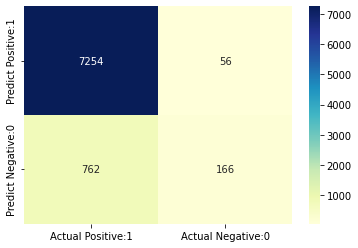

In [73]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#  ***3. Random Forest Classifier***

In [74]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier(n_estimators=200, 
                                 max_leaf_nodes=16, 
                                 random_state=42)

clf_rfc.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=200, random_state=42)

In [75]:
y_pred_test = clf_rfc.predict(X_test)

y_pred_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [76]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training set score: {:.4f}'.format(clf_rfc.score(X_train, y_train)))

cm = confusion_matrix(y_test,y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print('\nclassification_report :\n',classification_report(y_test,y_pred_test))

Model accuracy score: 0.8990
Training set score: 0.8989
Confusion matrix

 [[7265   45]
 [ 787  141]]

True Positives(TP) =  7265

True Negatives(TN) =  141

False Positives(FP) =  45

False Negatives(FN) =  787

classification_report :
               precision    recall  f1-score   support

          no       0.90      0.99      0.95      7310
         yes       0.76      0.15      0.25       928

    accuracy                           0.90      8238
   macro avg       0.83      0.57      0.60      8238
weighted avg       0.89      0.90      0.87      8238



<AxesSubplot:>

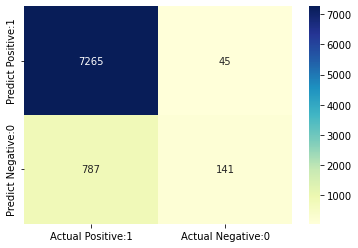

In [77]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# ***4. KNN***

In [78]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors = 3)

clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
y_pred_test = clf_knn.predict(X_test)

y_pred_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [80]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8861


In [81]:
clf_knn_5 = KNeighborsClassifier(n_neighbors = 5)

clf_knn_5.fit(X_train,y_train)

KNeighborsClassifier()

In [82]:
y_pred_test = clf_knn_5.predict(X_test)

y_pred_test

array(['no', 'yes', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [83]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8960


In [84]:
clf_knn_7 = KNeighborsClassifier(n_neighbors = 7)

clf_knn_7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [85]:
y_pred_test = clf_knn_7.predict(X_test)

y_pred_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [86]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8973


In [87]:
clf_knn_9 = KNeighborsClassifier(n_neighbors = 9)

clf_knn_9.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [88]:
y_pred_test = clf_knn_9.predict(X_test)

y_pred_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [89]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8990


In [90]:
clf_knn_10 = KNeighborsClassifier(n_neighbors = 10)

clf_knn_10.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [91]:
y_pred_test = clf_knn_10.predict(X_test)

y_pred_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [92]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8982


In [93]:
clf_knn_3 = KNeighborsClassifier(n_neighbors = 3)

clf_knn_3.fit(X_train,y_train)

y_pred_test = clf_knn_3.predict(X_test)

In [94]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training set score: {:.4f}'.format(clf_knn_3.score(X_train, y_train)))

cm = confusion_matrix(y_test,y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print('\nclassification_report :\n',classification_report(y_test,y_pred_test))

Model accuracy score: 0.8861
Training set score: 0.9224
Confusion matrix

 [[7025  285]
 [ 653  275]]

True Positives(TP) =  7025

True Negatives(TN) =  275

False Positives(FP) =  285

False Negatives(FN) =  653

classification_report :
               precision    recall  f1-score   support

          no       0.91      0.96      0.94      7310
         yes       0.49      0.30      0.37       928

    accuracy                           0.89      8238
   macro avg       0.70      0.63      0.65      8238
weighted avg       0.87      0.89      0.87      8238



# ***5. Adaboost Classifier***

In [95]:
from sklearn.ensemble import AdaBoostClassifier

clf_adc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

clf_adc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, random_state=42)

In [96]:
y_pred_test = clf_adc.predict(X_test)

y_pred_test

array(['no', 'no', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [97]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training set score: {:.4f}'.format(clf_adc.score(X_train, y_train)))

Model accuracy score: 0.9005
Training set score: 0.9004


In [98]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training set score: {:.4f}'.format(clf_adc.score(X_train, y_train)))

cm = confusion_matrix(y_test,y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print('\nclassification_report :\n',classification_report(y_test,y_pred_test))

Model accuracy score: 0.9005
Training set score: 0.9004
Confusion matrix

 [[7226   84]
 [ 736  192]]

True Positives(TP) =  7226

True Negatives(TN) =  192

False Positives(FP) =  84

False Negatives(FN) =  736

classification_report :
               precision    recall  f1-score   support

          no       0.91      0.99      0.95      7310
         yes       0.70      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



In [99]:
cvs = cross_val_score(clf_adc,
                        X_train,
                        y_train,
                        cv=5,
                        scoring='accuracy')

print('Cross-validation scores:{}'.format(cvs))

print('Average cross-validation score: {:.4f}'.format(cvs.mean()))

Cross-validation scores:[0.89984825 0.90060698 0.89590288 0.89848255 0.9       ]
Average cross-validation score: 0.8990


In [100]:
clf_adc_2 =AdaBoostClassifier(n_estimators=50, base_estimator=clf_dtc,learning_rate=1, random_state=42)

clf_adc_2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=42),
                   learning_rate=1, random_state=42)

In [101]:
y_pred_test = clf_adc_2.predict(X_test)

y_pred_test

array(['no', 'yes', 'yes', ..., 'no', 'no', 'no'], dtype=object)

In [102]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training set score: {:.4f}'.format(clf_adc_2.score(X_train, y_train)))

Model accuracy score: 0.9009
Training set score: 0.9069


In [103]:
cm = confusion_matrix(y_test,y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print('\nclassification_report :\n',classification_report(y_test,y_pred_test))

Confusion matrix

 [[7166  144]
 [ 672  256]]

True Positives(TP) =  7166

True Negatives(TN) =  256

False Positives(FP) =  144

False Negatives(FN) =  672

classification_report :
               precision    recall  f1-score   support

          no       0.91      0.98      0.95      7310
         yes       0.64      0.28      0.39       928

    accuracy                           0.90      8238
   macro avg       0.78      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238



In [104]:
cvs = cross_val_score(clf_adc_2,
                        X_train,
                        y_train,
                        cv=5,
                        scoring='accuracy')

print('Cross-validation scores:{}'.format(cvs))

print('Average cross-validation score: {:.4f}'.format(cvs.mean()))

Cross-validation scores:[0.89726859 0.89817906 0.88725341 0.892261   0.8939302 ]
Average cross-validation score: 0.8938


In [105]:
# from sklearn.naive_bayes import GaussianNB

# clf_gnb = GaussianNB()

# clf_gnb.fit(X_train, y_train)

# ***SVM***

In [106]:
from sklearn.svm import SVC

t0 = time()

clf_svc=SVC(C=0.5 ,random_state=42, probability=True)

clf_svc.fit(X_train,y_train)

print('Time:',time() - t0)

Time: 1038.654500246048


In [107]:
t0 = time()

y_pred_test = clf_svc.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Time:',time() - t0)

Model accuracy score: 0.9018
Time: 9.304500102996826


**Select model with best accuracy to Hyperparameter Optimization using GridSearch CV**

Accuracy Model :

- Logreg = 0.8997
- Decision Tree = 0.9007
- Random Forest = 0.8990
- KNN = 0.8861
- SVM = 0.8991
- Other Algorithm (Adaboost Classifier) = 0.9005

I choose the top 3 classifiers with maximum accuracy for ensemble modeling.

They are `LinearRegression`, `Decision Tree` and `AdaboostClassifier`

So, we will tune the hyperparameters of these models before proceeding.


**Logistic Regression Parameter Tuning**

In [108]:
from sklearn.model_selection import GridSearchCV

clf_lr = LogisticRegression(random_state=42)


lr_params={'penalty':['l1','l2'], 
           'C':[1, 10]}


lr_grid_search = GridSearchCV(estimator = clf_lr,  
                               param_grid = lr_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)


lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [109]:
# examine the best model

# best score achieved during the GridSearchCV
print('Logistic Regression GridSearch CV best score : {:.4f}\n\n'.format(lr_grid_search.best_score_))

# print parameters that give the best results
print('Logistic Regression that give the best results :','\n\n', (lr_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
lr_best = lr_grid_search.best_estimator_
print('\n\nLogistic Regression that was chosen by the search :','\n\n', (lr_best))

Logistic Regression GridSearch CV best score : 0.8990


Logistic Regression that give the best results : 

 {'C': 1, 'penalty': 'l2'}


Logistic Regression that was chosen by the search : 

 LogisticRegression(C=1, random_state=42)


**Decision Tree Parameter Tuning**

In [110]:
clf_dtc = DecisionTreeClassifier(random_state=42)


dtc_params={'criterion':['gini','entrophy'], 
            'splitter':['best','random'],
            'max_depth':[3,4,8,16]}


dtc_grid_search = GridSearchCV(estimator = clf_dtc,  
                               param_grid = dtc_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)


dtc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': [3, 4, 8, 16],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [111]:
# examine the best model

# best score achieved during the GridSearchCV
print('Decision Tree GridSearch CV best score : {:.4f}\n\n'.format(dtc_grid_search.best_score_))

# print parameters that give the best results
print('Decision Tree that give the best results :','\n\n', (dtc_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
dtc_best = dtc_grid_search.best_estimator_
print('\n\nDecision Tree that was chosen by the search :','\n\n', (dtc_best))

Decision Tree GridSearch CV best score : 0.8994


Decision Tree that give the best results : 

 {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}


Decision Tree that was chosen by the search : 

 DecisionTreeClassifier(max_depth=3, random_state=42)


**AdaBoost Classifier Parameter Tuning**

In [112]:
abc_params = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

dtc_clf = DecisionTreeClassifier(random_state = 42, max_features = "auto", class_weight = "balanced", max_depth = None)

abc_clf = AdaBoostClassifier(base_estimator = dtc_clf)


abc_grid_search = GridSearchCV(estimator = abc_clf,  
                               param_grid = abc_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)


abc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_features='auto',
                                                                                random_state=42)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [1, 2]},
             scoring='accuracy')

In [113]:
# examine the best model

# best score achieved during the GridSearchCV
print('AdaBoost GridSearch CV best score : {:.4f}\n\n'.format(abc_grid_search.best_score_))

# print parameters that give the best results
print('AdaBoost Parameters that give the best results :','\n\n', (abc_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
abc_best = abc_grid_search.best_estimator_
print('\n\nXGBoost Estimator that was chosen by the search :','\n\n', (abc_best))

AdaBoost GridSearch CV best score : 0.8595


AdaBoost Parameters that give the best results : 

 {'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'best', 'n_estimators': 2}


XGBoost Estimator that was chosen by the search : 

 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_features='auto',
                                                         random_state=42),
                   n_estimators=2)


**Ensemble Modeling**

In [114]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('lr',lr_best), ('dtc',dtc_best), ('abc',abc_best)], voting='soft')

votingC = votingC.fit(X_train, y_train)

**Model Inference**

In [115]:
df.sample(5).T

,39768,4209,29734,23085,17746
age,72,33,41,40,47
job,retired,technician,blue-collar,technician,services
marital,single,divorced,married,divorced,divorced
education,university.degree,professional.course,high.school,professional.course,professional.course
default,no,no,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,no
contact,cellular,telephone,cellular,cellular,cellular
month,may,may,apr,aug,jul
day_of_week,fri,mon,mon,tue,tue


In [116]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [117]:
new_data = [{'age':42, 'job':'blue-collar', 'marital':'married',
             'education':'high.school', 'default':'unknown',
             'housing':'yes', 'loan':'yes', 'contact':'telephone',
             'month':'jun', 'day_of_week':'wed', 'campaign':2, 
             'previous':5, 'poutcome':'success', 'emp.var.rate':1.4, 
             'cons.price.idx':93,'cons.conf.idx':-46, 
             'euribor3m':1200, 'nr.employed':5001}]
new_data = pd.DataFrame(new_data,index=[1])
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
1,42,blue-collar,married,high.school,unknown,yes,yes,telephone,jun,wed,2,5,success,1.4,93,-46,1200,5001


In [118]:
new_sample = full_pipeline.transform(new_data)

In [119]:
new_pred = votingC.predict(new_sample)
new_pred

array(['yes'], dtype=object)

**Overall Analysis**

In this kernel I'm trying to build a model with prepared datasets to predict subscriber consumers or not. There are 7 models used and the results of the accuracy scores obtained are:

- Logreg = 0.8997
- Decision Tree = 0.9007
- Random Forest = 0.8990
- KNN = 0.8861
- SVM = 0.8996
- Other Algorithm (Adaboost Classifier) = 0.9005

After getting each accuracy, then I took the 3 best models for hyper parameter tuning they are `Logreg`,`Decision Tree` and `Adaboost Classifier`. Then an ensemble of models with votting classifier is carried out to get the best model that is ready to use.

*note: for model analysis, I have marked down each line after the classifier*